# Data Cleaning & Exploration

## Libraries

In [128]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## DF basics

In [2]:
df = pd.read_csv('../Data/Google-Playstore.csv')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
df.shape

(1118136, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

### Drop NaNs

In [6]:
df.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [7]:
# drop Nans in rating/rating count, installs/minimum installs (all columns with numerical values)

In [8]:
df = df.dropna(subset=['Rating', 'Installs', 'App Name', 'Category']).reset_index()

In [9]:
df.drop(['index'], axis = 1, inplace = True)

In [10]:
df.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        2011
Developer Id              2
Developer Website    411598
Developer Email          22
Released                946
Last Updated              0
Content Rating            0
Privacy Policy       152426
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

### Values

In [11]:
# Check for values
df['Rating'].unique()

array([3.6, 4.3, 4.2, 3.5, 4.4, 4. , 4.1, 3.3, 3. , 3.1, 3.2, 2.8, 4.5,
       4.9, 3.7, 3.9, 4.7, 0. , 1.1, 3.8, 3.4, 2.6, 4.6, 4.8, 2.4, 2.7,
       2. , 2.3, 2.2, 1.9, 5. , 2.1, 2.9, 2.5, 1.5, 1.7, 1.8, 1.6, 1.4,
       1.2, 1.3, 1. ])

In [12]:
df['Installs'].unique()

array(['100,000+', '1,000,000+', '50,000,000+', '100,000,000+', '50,000+',
       '10,000+', '10,000,000+', '5,000,000+', '500,000,000+', '500+',
       '500,000+', '1,000+', '100+', '5,000,000,000+', '5,000+', '10+',
       '50+', '1+', '5+', '1,000,000,000+', '0+', '10,000,000,000+'],
      dtype=object)

In [13]:
df['Installs'].value_counts() # remove + / ab 5mil+ zusammenfassen

1,000+             197466
100+               176192
10,000+            157465
10+                102678
500+                82736
100,000+            80118
5,000+              79917
50+                 61208
50,000+             51393
1+                  28469
1,000,000+          27010
5+                  25226
500,000+            20680
0+                   8826
5,000,000+           5498
10,000,000+          5168
50,000,000+           695
100,000,000+          423
500,000,000+           54
1,000,000,000+         47
5,000,000,000+         12
10,000,000,000+         1
Name: Installs, dtype: int64

In [14]:
df['Category'].value_counts()

Education                  114865
Music & Audio              104441
Entertainment               81896
Books & Reference           78886
Personalization             73418
Tools                       68273
Lifestyle                   54434
Business                    41835
Health & Fitness            31269
Productivity                30087
Photography                 28873
Travel & Local              25775
Finance                     24673
Puzzle                      24642
Food & Drink                24112
Sports                      21951
News & Magazines            21514
Shopping                    20320
Casual                      19981
Communication               18235
Arcade                      17376
Social                      16877
Simulation                  15068
Medical                     12468
Action                      12330
Art & Design                12270
Educational                 11288
Maps & Navigation           10391
Adventure                   10024
Video Players 

In [15]:
df['Currency'].unique() # whats up with XXX? > free?

array(['USD', 'XXX', 'EUR', 'RUB', 'ILS', 'VND', 'JPY', 'ZAR', 'LBP',
       'AUD', 'TWD', 'HKD', 'UAH', 'SEK', 'KRW', 'PKR', 'INR', 'CZK',
       'CAD', 'TRY', 'KZT', 'SGD', 'IDR', 'DZD', 'AED', 'CHF', 'GBP',
       'THB', 'BGN', 'SAR', 'DKK', 'NGN', 'BDT', 'NOK', 'HUF', 'KES',
       'LKR', 'NZD', 'MXN', 'RSD', 'MYR', 'BRL', 'COP', 'PEN', 'HRK',
       'BOB', 'CRC', 'PLN', 'PHP', 'EGP', 'GHS', 'CLP', 'TZS', 'RON'],
      dtype=object)

In [16]:
df['Currency'].value_counts() #put all prices in one currency

USD    1069376
XXX      41208
EUR        118
INR        101
PKR         53
TRY         40
BRL         40
GBP         37
RUB         29
VND         18
HKD         17
IDR         16
SAR         15
JPY         15
CAD         14
CHF         13
BDT         13
ILS         11
KRW         10
SGD         10
AED          9
UAH          9
NGN          8
BGN          8
SEK          7
THB          7
AUD          7
PLN          6
NOK          5
COP          5
LKR          4
EGP          4
MXN          4
CZK          4
PHP          4
ZAR          3
MYR          3
CLP          3
TWD          3
PEN          3
RON          3
GHS          2
LBP          2
NZD          2
DKK          2
KES          2
HUF          2
BOB          1
TZS          1
HRK          1
KZT          1
DZD          1
RSD          1
CRC          1
Name: Currency, dtype: int64

In [17]:
df['Price'].value_counts()

0.00     1064776
0.99       14100
1.99        5868
1.49        4358
2.99        3945
          ...   
69.00          1
12.91          1
17.84          1
8.57           1
5.59           1
Name: Price, Length: 705, dtype: int64

In [18]:
df['Size'].value_counts() # into integer? mb, kb..M &k removal? drop the varies

Varies with device    30694
11M                   29393
12M                   26461
13M                   22913
14M                   21693
                      ...  
526M                      1
306M                      1
820M                      1
796M                      1
347M                      1
Name: Size, Length: 1482, dtype: int64

In [19]:
df['Size'].unique()

array(['2.7M', '86M', '5.8M', ..., '709M', '338M', '262M'], dtype=object)

In [20]:
df['Content Rating'].value_counts() # clean up? everyone or other

Everyone           962526
Teen                99053
Mature 17+          31782
Everyone 10+        17802
Unrated                66
Adults only 18+        53
Name: Content Rating, dtype: int64

In [21]:
df['Minimum Android'].unique() # min version required >> organize? 1+, 2+? drop it?

array(['2.3 and up', '5.1 and up', '4.1 and up', '4.4 and up',
       '5.0 and up', '6.0 and up', '4.2 and up', '4.0 and up',
       'Varies with device', '8.0 and up', '7.0 and up', '3.2 and up',
       '1.5 and up', '4.3 and up', '4.0.3 and up', '2.2 and up',
       '2.1 and up', '7.1 and up', '4.4W and up', '2.3.3 and up',
       '3.0 and up', '1.6 and up', '4.1 - 8.0', nan, '2.0 and up',
       '2.0.1 and up', '3.1 and up', '4.1 - 7.0', '1.0 and up',
       '4.4 - 5.1', '2.3 - 4.4', '2.3 - 4.4W', '1.1 and up', '5.0 - 6.0',
       '2.2 - 4.3', '2.3 - 5.1', '4.0.3 - 8.0', '4.2 - 7.1.1',
       '4.3 - 4.4W', '4.0 - 4.4', '4.1 - 4.4', '4.1 - 6.0', '8.0',
       '2.1 - 5.0', '4.1 - 4.3', '1.5 - 2.1', '4.1 - 5.1', '7.0',
       '2.3 - 3.2', '4.4', '2.3.3 - 6.0', '4.1 - 7.1.1', '4.0 - 4.4W',
       '4.1 - 4.4W', '4.0.3 - 7.1.1', '2.2', '5.0 - 8.0', '3.0 - 5.0',
       '4.0 - 6.0', '4.4 - 7.1.1', '2.2 - 3.2', '2.3 - 4.0.2',
       '2.1 - 4.4', '2.2 - 4.0.4', '4.0 - 5.0', '6.0 - 7.1.1',
   

In [22]:
df['Minimum Installs'].value_counts() # zusammenfassen? 5.000000e+06 group 

1.000000e+03    197466
1.000000e+02    176192
1.000000e+04    157465
1.000000e+01    102678
5.000000e+02     82736
1.000000e+05     80118
5.000000e+03     79917
5.000000e+01     61208
5.000000e+04     51393
1.000000e+00     28469
1.000000e+06     27010
5.000000e+00     25226
5.000000e+05     20680
0.000000e+00      8826
5.000000e+06      5498
1.000000e+07      5168
5.000000e+07       695
1.000000e+08       423
5.000000e+08        54
1.000000e+09        47
5.000000e+09        12
1.000000e+10         1
Name: Minimum Installs, dtype: int64

In [23]:
df['Maximum Installs'].value_counts() # drop as its similar to installs

1           8907
0           8826
2           7103
6           6465
3           6461
            ... 
5986563        1
1106036        1
15745120       1
1243191        1
76325          1
Name: Maximum Installs, Length: 206997, dtype: int64

### Data cleaning

In [24]:
# category bis adventure, rest other
# installs # remove + / ab 5mil+ zusammenfassen
# min installs: zusammenfassen? 5.000000e+06 group 
# max installs drop
# drop min android column df['Minimum Android']
# size into integer, drop varies with device, remove m and k
# Content rating: everyone and other
# currency > all prices into one currency > drop currency // what is xxx filter for it and check what it is

In [25]:
df_clean = df.copy()

In [26]:
# Category
df_clean['Category'] = df_clean['Category'].replace(to_replace =["Video Players & Editors", 'Auto & Vehicles', 'Beauty', 'Racing', 'Role Playing', 'Trivia', 'House & Home', 'Board', 'Word', 'Card','Strategy', 'Events', 'Weather', 'Dating', 'Casino', 'Music', 'Libraries & Demo', 'Comics', 'Parenting'], value ="Other")

In [27]:
# df_clean['Category'].value_counts()

In [28]:
# Installs
df_clean['Installs'] = df_clean['Installs'].str.replace("+", "")

In [29]:
df_clean['Installs'] = df_clean['Installs'].str.replace(",", "")

In [30]:
df_clean['Installs'] = df_clean['Installs'].astype(int) 

In [31]:
df_clean['Installs'] = df_clean['Installs'].replace(to_replace = [5000000, 10000000,50000000, 100000000,500000000,1000000000, 5000000000, 10000000000], value = 5000000)

In [32]:
# df_clean['Installs'].value_counts()

In [33]:
# min installs
df_clean['Minimum Installs'] = df_clean['Minimum Installs'].replace(to_replace = [1.000000e+07, 5.000000e+07, 1.000000e+08,5.000000e+08,1.000000e+09, 5.000000e+09, 1.000000e+10], value = 5.000000e+06)

In [34]:
#df_clean['Minimum Installs'].value_counts()

In [35]:
# max installs
df_clean.drop(['Maximum Installs'], axis = 1, inplace = True)

In [36]:
# min android
df_clean.drop(['Minimum Android'], axis = 1, inplace = True)

In [38]:
# Size
df_clean = df_clean[df_clean.Size != 'Varies with device'].reset_index()

In [39]:
df_clean.drop(['index'], axis = 1, inplace = True)

In [76]:
# convert G, M in k
def convert_to_kb(s):
    if re.findall(r'M+', s):
        s = s.replace("M", "").replace(",", ".")
        s = float(s)*1000
        return s
    elif re.findall(r'G+', s):
        s = s.replace("G", "").replace(",", ".")
        s = float(s)*1000000
        return s
    elif re.findall(r'k+', s):
        s = s.replace("k", "").replace(",", ".")
        s = float(s)
        return s
    else:
        return s

In [80]:
df_clean['Size'] = df_clean['Size'].apply(convert_to_kb)

In [83]:
df_clean = df_clean.rename(columns={"Size": "Size_kb"})

In [86]:
# Content rating
df_clean['Content Rating'] = df_clean['Content Rating'].replace(to_replace = ['Teen', 'Mature 17+', 'Everyone 10+', 'Unrated', 'Adults only 18+'], value = 'Other')

In [87]:
df_clean['Content Rating'].value_counts() 

Everyone    937429
Other       143159
Name: Content Rating, dtype: int64

In [42]:
# currency > all prices into one currency > drop currency // what is xxx filter for it and check what it is
# 'XXX' is thrown if the app is free and no currency is given. Some apps that are free still gave a currency, that's why there is different amount

In [108]:
df_clean1 = df_clean.copy()

In [96]:
import requests
  
class Currency_convertor:
    # empty dict to store the conversion rates
    rates = {} 
    def __init__(self, url):
        data = requests.get(url).json()
  
        # Extracting only the rates from the json data
        self.rates = data["rates"] 
  
    # function to do a simple cross multiplication between 
    # the amount and the conversion rates
    def convert(self, from_currency, to_currency, amount):
        initial_amount = amount
        if from_currency != 'EUR' :
            amount = amount / self.rates[from_currency]
  
        # limiting the precision to 2 decimal places
        amount = round(amount * self.rates[to_currency], 2)
        print('{} {} = {} {}'.format(initial_amount, from_currency, amount, to_currency))
  
# Driver code
if __name__ == "__main__":
  
    # YOUR_ACCESS_KEY = 'GET YOUR ACCESS KEY FROM fixer.io'
    url = str.__add__('http://data.fixer.io/api/latest?access_key=', 8eaedbd2b6cc572528984ec10219e8b6)  
    c = Currency_convertor(url)
    from_country = input("From Country: ")
    to_country = input("TO Country: ")
    amount = int(input("Amount: "))
  
    c.convert(from_country, to_country, amount)

SyntaxError: invalid syntax (<ipython-input-96-24496022ac5b>, line 27)

### Datetime conversions

In [99]:
# released/last updated into datetime
df_clean['Released'] = pd.to_datetime(df_clean['Released'],infer_datetime_format=True, format='%b %d, %Y', errors='coerce')

In [102]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'],infer_datetime_format=True, format='%b %d, %Y', errors='coerce')

In [107]:
# new column App-age
now = pd.Timestamp('now')
df_clean['Released'] = pd.to_datetime(df_clean['Released'], format="%Y-%m-%d %H:%M:%S")    
df_clean['Released'] = df_clean['Released'].where(df_clean['Released'] < now, df_clean['Released'] -  np.timedelta64(100, 'Y'))  #np.timedelta64(366, 'D') 
df_clean['App-age'] = (now - df_clean['Released']).astype('<m8[Y]')    #.astype('timedelta64[D]'
#print(df_clean['App-age'])

In [ ]:
# app age in Y and month? > check my # days work, months doesnt

In [136]:
# date to ordinal Released/lastUpdated
df_clean.dropna(subset=['Released'], inplace = True) # drop 751 na's

In [137]:
def date_to_ordinal(d):
    return d.toordinal()

In [138]:
df_clean['Released'] = df_clean['Released'].apply(date_to_ordinal)

In [142]:
df_clean['Last Updated'] = df_clean['Last Updated'].apply(date_to_ordinal)

# Data prepocessing for ML

In [148]:
df_prep = df_clean.copy()

In [149]:
# drop: App Name, App Id , Developer Id, Developer Website, Developer Email, Privacy Policy > not relevant
df_prep.drop(['App Name', 'App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy'], axis = 1, inplace = True)

In [150]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079837 entries, 0 to 1080587
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Category          1079837 non-null  object 
 1   Rating            1079837 non-null  float64
 2   Rating Count      1079837 non-null  float64
 3   Installs          1079837 non-null  int64  
 4   Minimum Installs  1079837 non-null  float64
 5   Free              1079837 non-null  bool   
 6   Price             1079837 non-null  float64
 7   Currency          1079837 non-null  object 
 8   Size_kb           1079837 non-null  float64
 9   Released          1079837 non-null  int64  
 10  Last Updated      1079837 non-null  int64  
 11  Content Rating    1079837 non-null  object 
 12  Ad Supported      1079837 non-null  bool   
 13  In App Purchases  1079837 non-null  bool   
 14  Editors Choice    1079837 non-null  bool   
 15  App-age           1079837 non-null  float64
dtype

## Correlations/Collinearity

In [45]:
# Data prepocessing for machine learning dataset:

# CORRELATIONS: drop correlations/heatmap
# OUTLIERS: check
# DUMMIES: 20,21,22, 8 bool into 1 and 0
# object columns into dummies? which ones?


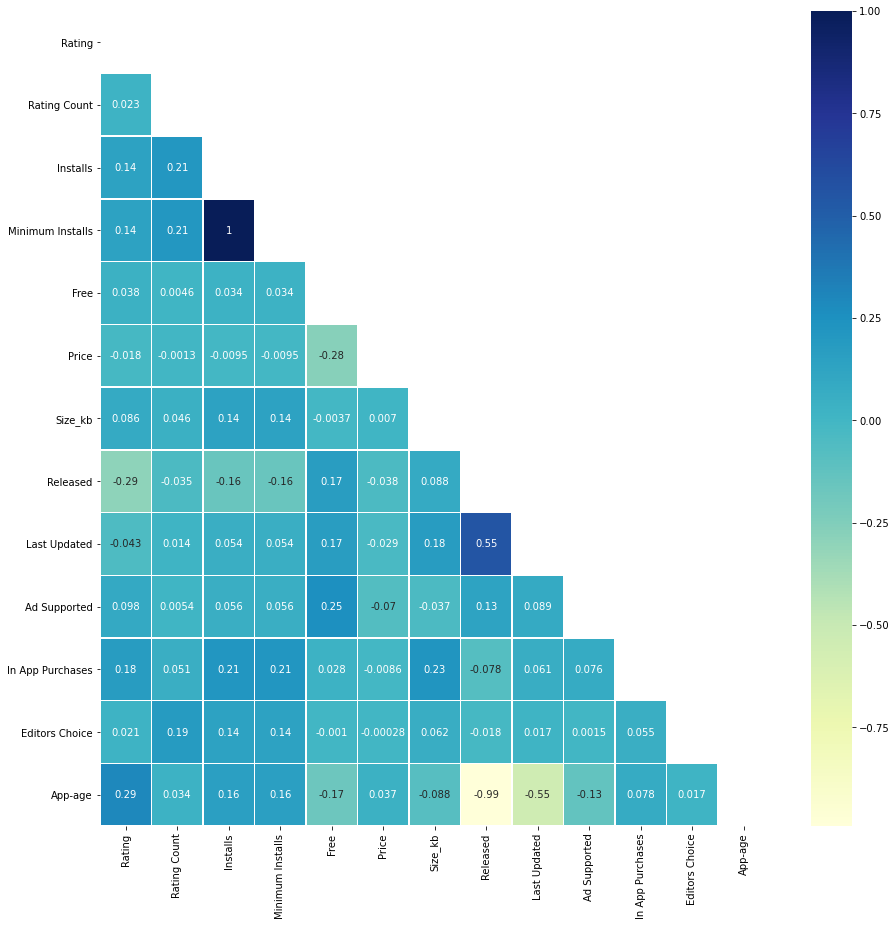

In [152]:
# High collinearity
heatmap = df_prep.select_dtypes(['int64', 'float64']) # only numerical

c = df_prep.corr()
fig_dims = (15, 15)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask,cmap="YlGnBu", linewidths=.5)
plt.show()

In [ ]:
# drop min installs?

In [153]:
X = df_prep.drop(columns = 'Rating')
y = df_prep['Rating']

In [154]:
X.corrwith(y) # all superlow correlation. what to do?

Rating Count        0.023285
Installs            0.139940
Minimum Installs    0.139940
Free                0.038162
Price              -0.017956
Size_kb             0.086408
Released           -0.294107
Last Updated       -0.043365
Ad Supported        0.097538
In App Purchases    0.181120
Editors Choice      0.021162
App-age             0.293617
dtype: float64

## Outliers

In [ ]:
# find outliers
import scipy.stats as stats
z_scores = stats.zscore(df_prep)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_prep = df_prep[filtered_entries]

## Rating

In [46]:
# drop 0s
# class inbalance > downsampling? (manually (sample function, tts > train set downsampling, not testset!) or lib)
# tommek links method

In [47]:
df[df['Rating']== 0].count()

App Name             433265
App Id               433265
Category             433265
Rating               433265
Rating Count         433265
Installs             433265
Minimum Installs     433265
Maximum Installs     433265
Free                 433265
Price                433265
Currency             433265
Size                 433265
Minimum Android      432054
Developer Id         433265
Developer Website    245076
Developer Email      433259
Released             433203
Last Updated         433265
Content Rating       433265
Privacy Policy       368015
Ad Supported         433265
In App Purchases     433265
Editors Choice       433265
dtype: int64

<AxesSubplot:>

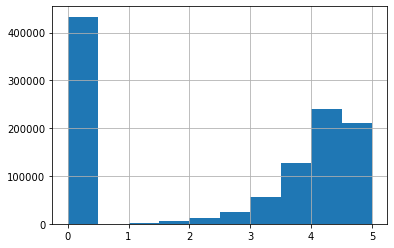

In [48]:
df['Rating'].hist() # unbalanced ds  (drop all 0s and work with the rest)